# Gender Representation in Video Games
### Below we began analysis on how the sexualization of characters affects the average rating of various video games, however, later realized that there was a weak correlation between the two pieces of data and transitioned to analysis on the number of female team members and amount of non-male protagonists in the various games as the data has a moderate positive correlation. We then proceeded to run a single variable regression using those two variables and then decided to create a predictive logistical regression containing multiple variables from the dataset to predict the number of non-male protagonists in the video games based.


In [297]:
#importing all the tool kits needed to conduct this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Here we are going to refine the data by dropping unneeded columns from the games data frame

In [298]:
df_games = pd.read_csv('games.csv') #'games.csv', 'characters.grivg.csv', 'sexualization.csv'])
df_games.columns
df_games = df_games.drop(["Unnamed: 27","Destructoid", "IGN","GameSpot"], axis=1)

#### We are importing the characters dataset 

In [299]:
df_ch = pd.read_csv('characters.grivg.csv') #'games.csv', 'characters.grivg.csv', 'sexualization.csv'])
df_ch.head()

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
0,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,PA,No
1,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
2,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
3,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,SC,No
4,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,MC,No


#### We are importing the sexualization dataset

In [300]:
df_sx = pd.read_csv('sexualization.csv') #'games.csv', 'characters.grivg.csv', 'sexualization.csv'])
df_sx

,Id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0
...,...,...,...,...,...,...
632,KBOS_Beni,0,0,0,0,0
633,KBOS_Taro,0,0,0,0,0
634,KBOS_Rusu,0,0,0,0,0
635,KBOS_Adira,0,0,0,0,0


## After importing both datasets we are going to join them on the variable 'Id'

In [301]:
df_concat = pd.merge(df_ch, df_sx, on='Id', how='outer')
df_concat.head()

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,PA,No,0,0,0,0,0
1,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,PA,No,0,0,0,0,0
2,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,SC,No,0,0,0,0,0
3,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,SC,No,0,0,0,0,0
4,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,MC,No,0,0,0,0,0


In [302]:
df_concat.describe()

,Playable,Sexualization,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.193093,0.086342,0.029827,0.010989,0.028257,0.017268,0.086342
std,0.395035,0.389022,0.170244,0.104333,0.165838,0.130372,0.389022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## Next we will create a data dictionary and data frame containing each game with the respective rating of character sexualization

In [303]:
game_list = df_concat.Game.unique()
game_dict = {}
for i in game_list:
    game_dict[i] = 0

In [304]:
for index, row in df_concat.iterrows():
    game_dict[row['Game']] = game_dict[row['Game']] + row['Sexualization']


In [305]:
test = {'Game_Id': list(game_dict.keys()), 'Sexualization': list(game_dict.values())}
#df_game_sx = pd.DataFrame(data=[pd.Series(game_dict.values()),pd.Series(game_dict.keys()) ], columns=['Game_Id', 'Sexualization'])

In [306]:
df_game_sx = pd.DataFrame(data=test)


In [307]:
df_game_sx

,Game_Id,Sexualization
0,CODMW,0
1,PSS,0
2,SMO,4
3,BOTW,2
4,PSM,0
...,...,...
59,TBOIR,0
60,COL,0
61,FLR,0
62,MSMMM,0


# Next we will merge the games dataset with the data frame we created from the data dictionary on the 'Game_Id' variable and this will be the final data frame we are going to use to run a correlational analysis 

In [308]:
df_games2 = pd.merge(df_games, df_game_sx, on='Game_Id', how='outer')
df_games2.head()

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Relevant_no_males,Percentage_non_male,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Avg_Reviews,Sexualization
0,GTAV,Grand Theft Auto V,Nov-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,2,18%,MS,M,7,0,0%,9.7,9.4,6
1,PSS,Pokémon Sword/Shield,Nov-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,...,5,56%,MS,M,9,1,11%,8.0,8.3,0
2,CODMW,Call of Duty: Modern Warfare,Oct-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,...,1,17%,MS,M,11,0,0%,8.0,7.8,0
3,RDR2,Red Dead Redemption 2,Dec-18,Red Dead,Action-adventure,Action-adventure,Rockstar Studios,Rockstar Games,USA,Multi,...,7,29%,SR,M,7,0,0%,9.7,9.6,0
4,SMO,Super Mario Odyssey,Oct-17,Super Mario,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Nintendo Switch,...,2,40%,SR,M,11,1,9%,9.7,9.8,4


In [309]:
df_games2.columns

Index(['Game_Id', 'Title', 'Release', 'Series', 'Genre', 'Sub-genre',
       'Developer', 'Publisher', 'Country', 'Platform', 'PEGI',
       'Customizable_main', 'Protagonist', 'Protagonist_Non_Male',
       'Relevant_males', 'Relevant_no_males', 'Percentage_non_male',
       'Criteria', 'Director', 'Total_team', 'female_team', 'Team_percentage',
       'Metacritic ', 'Avg_Reviews', 'Sexualization'],
      dtype='object')

In [310]:
#this is my condensed data frame I uploaded to the repository 

df_games2.to_csv('final_games_data.csv')

# Next we created a heat map of the correlations from the final merged dataset to examine the relationship between columns

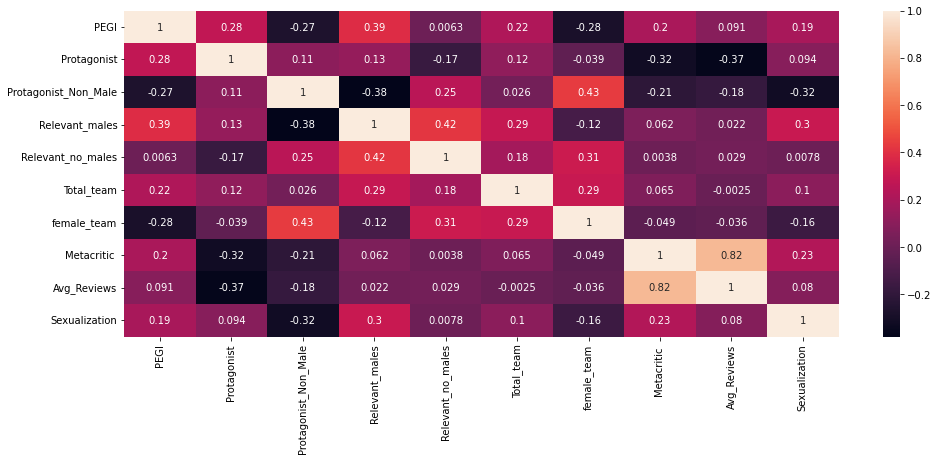

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_games2.corr(),annot=True)

### We decided that after examining the heat chart that the sexualization of female characters and average reviews had a weak positive correlation, however, the number of female team members had a moderate positive correlation with the amount of non-male protagonists in the various games, so we decided to continue analysis with those two pieces of data.

## Next, we will begin to train the model to be able to predict the number of non-male protagonists  

In [312]:
def show_single_variable_linear_regression(female_team, Protagonist_Non_Male):
    
    #Get number of examples
    N_EXAMPLES = len(Protagonist_Non_Male)
    TEST_SIZE = round(0.25 * N_EXAMPLES)
    

    # Split the data into training/testing sets
    female_team_train = female_team[:-TEST_SIZE]
    female_team_test = female_team[-TEST_SIZE:]

    # Split the targets into training/testing sets
    Protagonist_Non_Male_train = Protagonist_Non_Male[:-TEST_SIZE]
    Protagonist_Non_Male_test = Protagonist_Non_Male[-TEST_SIZE:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(female_team_train, Protagonist_Non_Male_train)

    # Make predictions using the testing set
    Protagonist_Non_Male_pred = regr.predict(female_team_test)

    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Protagonist_Non_Male_test, Protagonist_Non_Male_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Protagonist_Non_Male_test, Protagonist_Non_Male_pred))

    # Plot outputs
    plt.scatter(female_team_train[:100], Protagonist_Non_Male_train[:100], color="black")
    plt.plot(female_team_test[:100], Protagonist_Non_Male_pred[:100], color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Coefficients: 
 [0.27462437]
Mean squared error: 0.27
Coefficient of determination: -0.42


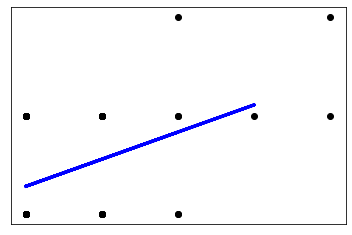

In [313]:
show_single_variable_linear_regression(df_games2.female_team.values.reshape(-1,1), df_games2.Protagonist_Non_Male)

## After conducting a linear regression we decided that it wasn't an accurate predictor of non-male protagonists because the coefficient of determination was still significantly below 1 so we wanted to explore how the data would fare in a logistic regression instead.

In [314]:
x = df_games2[['female_team', 'Avg_Reviews', 'Protagonist','Relevant_males', 'Relevant_no_males','PEGI','Sexualization']]

y = df_games2['Protagonist_Non_Male']


print(x)
print(y)

    female_team  Avg_Reviews  Protagonist  Relevant_males  Relevant_no_males  \
0             0          9.4            3               9                  2   
1             1          8.3            1               4                  5   
2             0          7.8            3               5                  1   
3             0          9.6            1              17                  7   
4             1          9.8            1               3                  2   
..          ...          ...          ...             ...                ...   
59            0          8.9            1               7                  4   
60            3          8.5            1               6                  7   
61            0          8.8            1               1                  1   
62            1          8.4            1               7                  5   
63            1          8.3            1               5                  5   

    PEGI  Sexualization  
0     18     

In [315]:
from sklearn.metrics import accuracy_score

def train_logistic_regression(x, y):
    
    #Get number of examples
    N_EXAMPLES = len(y)
    TEST_SIZE = round(0.25 * N_EXAMPLES)

    # Split the data into training/testing sets
    x_train = x[:-TEST_SIZE]
    x_test = x[-TEST_SIZE:]

    # Split the targets into training/testing sets
    y_train = y[:-TEST_SIZE]
    y_test = y[-TEST_SIZE:]

    # Create logistic regression object
    regr = linear_model.LogisticRegression(solver='liblinear')

    # Train the model using the training sets
    regr.fit(x_train, y_train)
    
    # Look at training error
    y_pred_train = regr.predict(x_train)
    print(accuracy_score(y_train, y_pred_train))

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    # Get test error
    print(accuracy_score(y_test, y_pred))
    
    print(regr.coef_)
    
    return regr

In [316]:
train_logistic_regression(x, y)

0.8125
0.8125
[[-0.19910458 -0.02601364 -1.20699597  0.56557772 -0.72811089  0.09855519
   0.65730341]
 [-0.49664941  0.2189263   0.97081874 -0.46950801  0.67978343 -0.20474292
  -0.6349867 ]
 [ 1.04934914 -0.9647555   0.3231453  -0.34655749  0.15834896  0.3503323
  -0.36581211]]


LogisticRegression(solver='liblinear')

##### We decided to shuffle the dataset to ensure that the model does not underfit or overfit the data.

In [317]:
from sklearn.utils import shuffle

x_shuffled, y_shuffled = shuffle(x, y, random_state=0)
train_logistic_regression(x_shuffled, y_shuffled)

0.8125
0.875
[[ 0.17469784 -0.09246995 -0.90286905  0.5792345  -0.83232254  0.0998594
   0.71896347]
 [-0.84448735  0.27245747  0.56621015 -0.52846739  0.8333246  -0.19061519
  -0.71121334]
 [ 1.07865554 -0.9334761   0.4011654  -0.35643563  0.12967838  0.33566355
  -0.29597121]]


LogisticRegression(solver='liblinear')

## The model we ended with had an 87% accuracy rate of being able to predict the number of non male protagonists using several variables from the dataset.